## Stock Price Prdictions and Analysis for Information Technology Companies

I initially chose the LSTM due to the volatile nature of the stock prices. LSTM(Long Short-Term Model) is proven to be good at predicting very volatile things due its mechanism.

In [1]:
#importing all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas_ta
import tensorflow as tf
import joblib

# Extracting the dataset for Oracle

In [2]:
#importing the dataset for Oracle corporation from 2015 to the end of 2023
ticker = 'ORCL'
oracle_df = yf.download(ticker, start = '2015-01-01', end = '2023-12-31')
oracle_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,45.020000,45.189999,43.970001,44.330002,38.042263,15070200
2015-01-05,44.160000,44.250000,43.580002,43.590000,37.508766,18369400
2015-01-06,44.060001,44.180000,42.990002,43.139999,37.121532,19229500
2015-01-07,43.330002,43.520000,43.009998,43.150002,37.130138,13502200
2015-01-08,43.630001,43.939999,43.380001,43.410000,37.353882,17516900


# Checking the information and shape of the dataframe, and also if there are any null values which we might need to change

In [3]:
print(oracle_df.shape)
print(oracle_df.info()) #to check for all the datatypes of the features

(2264, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2264 non-null   float64
 1   High       2264 non-null   float64
 2   Low        2264 non-null   float64
 3   Close      2264 non-null   float64
 4   Adj Close  2264 non-null   float64
 5   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB
None


In [4]:
print(oracle_df.duplicated().sum()) #to check for any duplicate rows that might exist

0


In [5]:
print(oracle_df.isnull().sum()) #to check for any null values 

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
print(oracle_df.describe()) #to get the summary statistics

              Open         High          Low        Close    Adj Close  \
count  2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean     60.497981    61.109779    59.959792    60.536025    56.624963   
std      21.557608    21.831025    21.307727    21.577619    22.577047   
min      33.799999    34.230000    33.130001    33.939999    29.655426   
25%      44.220001    44.645001    43.977500    44.317500    39.368246   
50%      52.995001    53.424999    52.430000    52.885000    48.912899   
75%      75.562498    76.577497    74.667503    75.810001    73.057699   
max     127.139999   127.540001   125.150002   126.709999   125.003242   

             Volume  
count  2.264000e+03  
mean   1.284404e+07  
std    7.572352e+06  
min    2.168200e+06  
25%    8.167250e+06  
50%    1.110380e+07  
75%    1.520105e+07  
max    7.913840e+07  


# Approach 3 - Using Linear Regression

I further analyzed the comparison of the predictions made by the Linear Regression Model as well as the LSTM model and the results are shown below

In [7]:
from sklearn.linear_model import LinearRegression, Ridge

# Prepare the dataset
df_lr = oracle_df.copy()
df_lr['target'] = df_lr['Adj Close'].shift(-1)
df_lr = df_lr.dropna()


In [8]:

# Feature and target variables for Linear Regression
features = ['Open', 'High', 'Low', 'Volume']
X_lr = df_lr[features]
y_lr = df_lr['target']


In [9]:

# Define the date ranges for training and testing
train_start_date = '2015-01-01'
train_end_date = '2022-12-31'
test_start_date = '2023-01-01'
test_end_date = '2023-12-31'

# Filter the data based on the date ranges
train_data = df_lr.loc[train_start_date:train_end_date]
test_data = df_lr.loc[test_start_date:test_end_date]

# Extract features and targets for training and testing
X_train_lr = train_data[features]
y_train_lr = train_data['target']
X_test_lr = test_data[features]
y_test_lr = test_data['target']


In [10]:

# Scaling the features
scaler = StandardScaler()
X_train_lr_scaled = scaler.fit_transform(X_train_lr)
X_test_lr_scaled = scaler.transform(X_test_lr)


In [11]:

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_lr_scaled, y_train_lr)

# Make predictions
lr_predictions = lr_model.predict(X_test_lr_scaled)

# Create a DataFrame for actual vs predicted
valid_lr = test_data.copy()
valid_lr['Predictions'] = lr_predictions

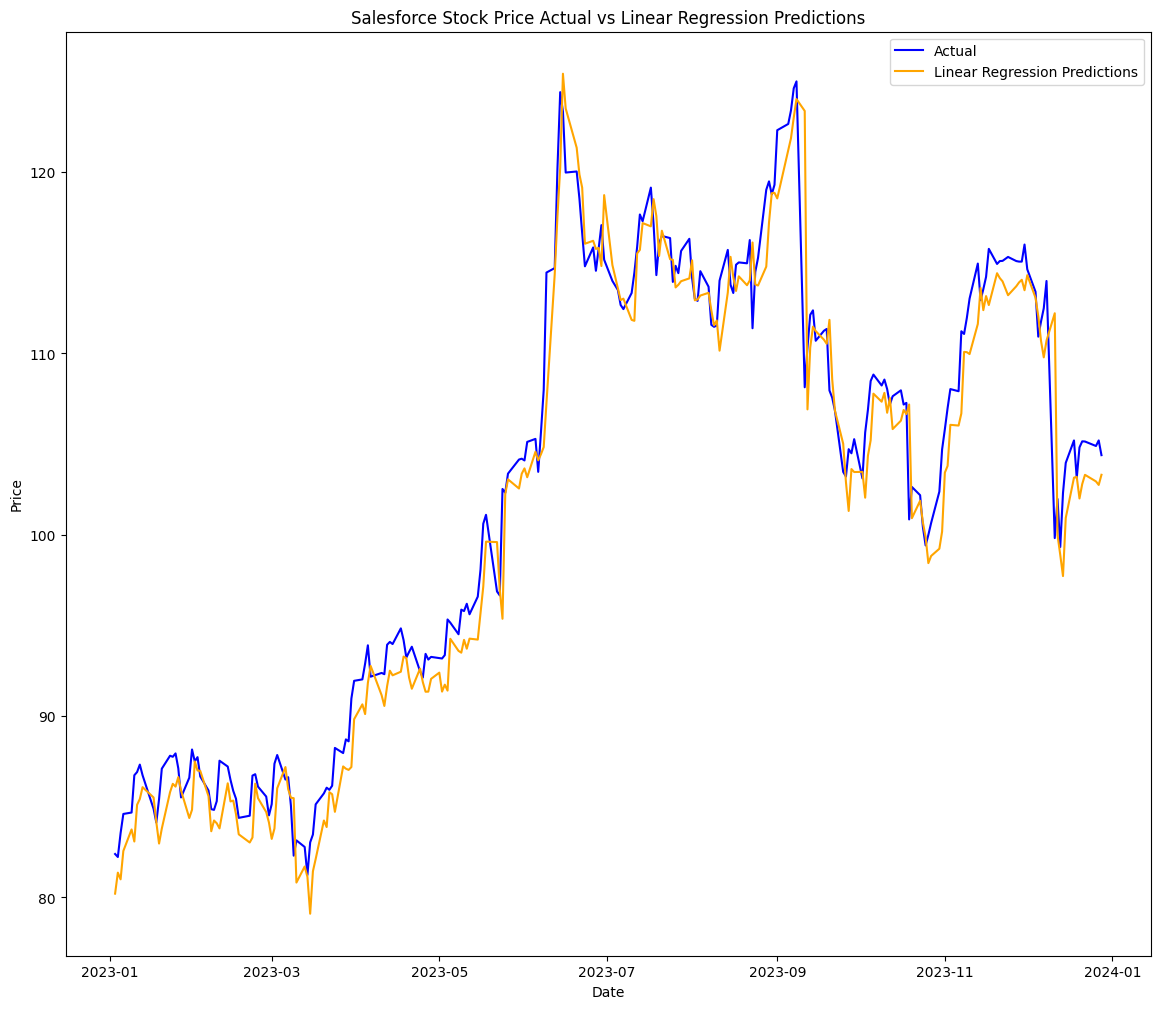

In [12]:

# Plotting results for Linear Regression
plt.figure(figsize=(14, 12))
plt.plot(valid_lr.index, valid_lr['target'], label='Actual', color='blue')
plt.plot(valid_lr.index, valid_lr['Predictions'], label='Linear Regression Predictions', color='orange')
plt.title('Salesforce Stock Price Actual vs Linear Regression Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
# Calculate performance metrics for Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_lr = mean_absolute_error(valid_lr['target'], valid_lr['Predictions'])
rmse_lr = np.sqrt(mean_squared_error(valid_lr['target'], valid_lr['Predictions']))

In [14]:
# Printing the MAE and RMSE
print(f'Mean Absolute Error (MAE) - Linear Regression: {mae_lr}')
print(f'Root Mean Squared Error (RMSE) - Linear Regression: {rmse_lr}')


Mean Absolute Error (MAE) - Linear Regression: 1.7432606584421446
Root Mean Squared Error (RMSE) - Linear Regression: 2.408324233118009


In [15]:
# Experiment with Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_lr_scaled, y_train_lr)
ridge_predictions = ridge_model.predict(X_test_lr_scaled)

valid_lr['Ridge Predictions'] = ridge_predictions


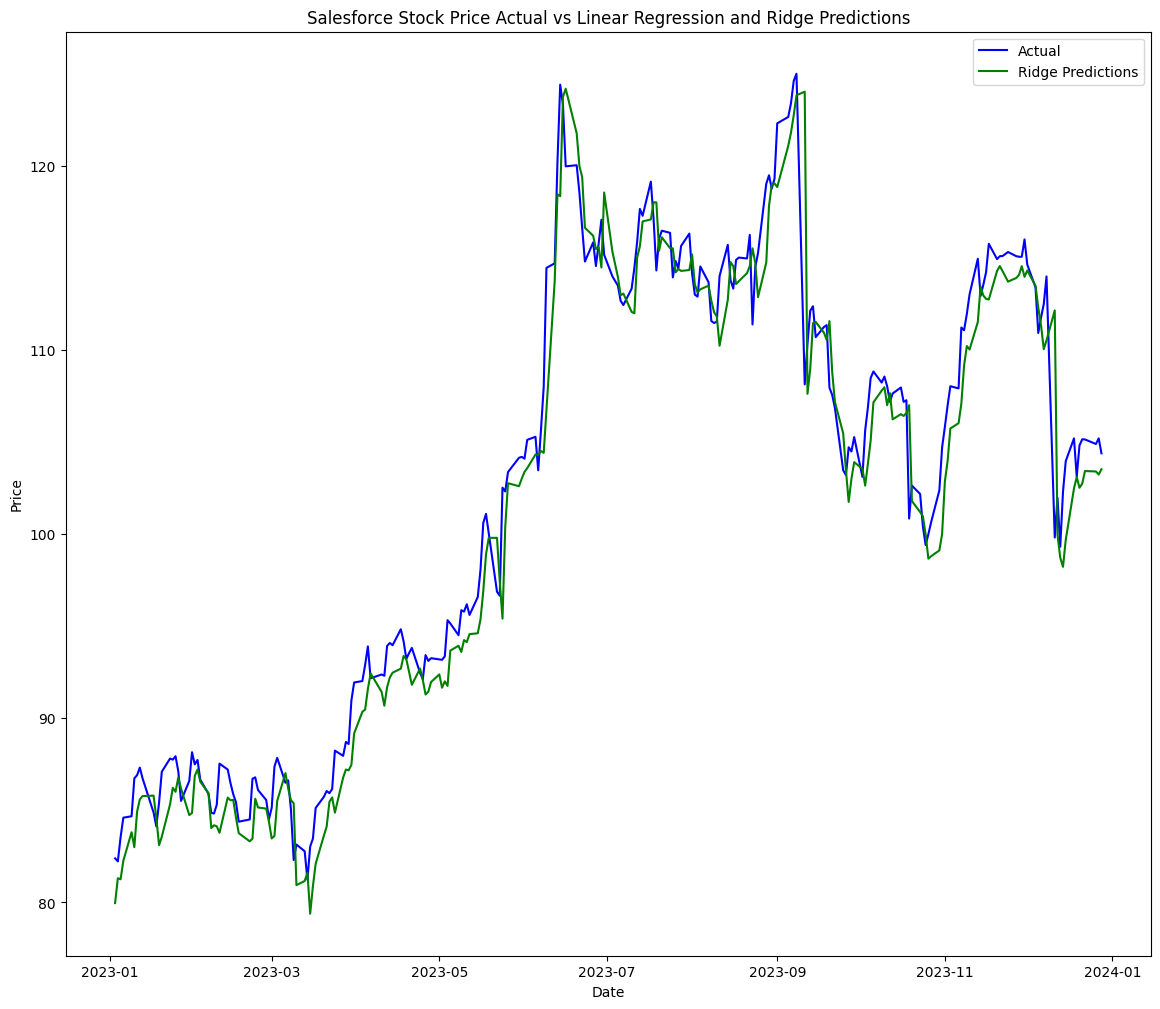

In [16]:
# Plotting results for Ridge Regression
plt.figure(figsize=(14, 12))
plt.plot(valid_lr.index, valid_lr['target'], label='Actual', color='blue')
plt.plot(valid_lr.index, valid_lr['Ridge Predictions'], label='Ridge Predictions', color='green')
plt.title('Salesforce Stock Price Actual vs Linear Regression and Ridge Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
# Calculate performance metrics for Ridge Regression
mae_ridge = mean_absolute_error(valid_lr['target'], valid_lr['Ridge Predictions'])
rmse_ridge = np.sqrt(mean_squared_error(valid_lr['target'], valid_lr['Ridge Predictions']))


In [18]:
# Printing the RMSE nad MAE
print(f'Mean Absolute Error (MAE) - Ridge Regression: {mae_ridge}')
print(f'Root Mean Squared Error (RMSE) - Ridge Regression: {rmse_ridge}')

Mean Absolute Error (MAE) - Ridge Regression: 1.7676581406885374
Root Mean Squared Error (RMSE) - Ridge Regression: 2.446001170663721


# Conclusion
Both the Linear Regression as well as the LSTM models performed really good. The LSTM model performed better and proved to be more accurate in predicting stock prices for the next day.